# Reducing hospital readmissions

## 📖 Background
You work for a consulting company helping a hospital group better understand patient readmissions. The hospital gave you access to ten years of information on patients readmitted to the hospital after being discharged. The doctors want you to assess if initial diagnoses, number of procedures, or other variables could help them better understand the probability of readmission. 

They want to focus follow-up calls and attention on those patients with a higher probability of readmission.

## 💾 The data
You have access to ten years of patient information ([source](https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008)):

#### Information in the file
- "age" - age bracket of the patient
- "time_in_hospital" - days (from 1 to 14)
- "n_procedures" - number of procedures performed during the hospital stay
- "n_lab_procedures" - number of laboratory procedures performed during the hospital stay
- "n_medications" - number of medications administered during the hospital stay
- "n_outpatient" - number of outpatient visits in the year before a hospital stay
- "n_inpatient" - number of inpatient visits in the year before the hospital stay
- "n_emergency" - number of visits to the emergency room in the year before the hospital stay
- "medical_specialty" - the specialty of the admitting physician
- "diag_1" - primary diagnosis (Circulatory, Respiratory, Digestive, etc.)
- "diag_2" - secondary diagnosis
- "diag_3" - additional secondary diagnosis
- "glucose_test" - whether the glucose serum came out as high (> 200), normal, or not performed
- "A1Ctest" - whether the A1C level of the patient came out as high (> 7%), normal, or not performed
- "change" - whether there was a change in the diabetes medication ('yes' or 'no')
- "diabetes_med" - whether a diabetes medication was prescribed ('yes' or 'no')
- "readmitted" - if the patient was readmitted at the hospital ('yes' or 'no') 

***Acknowledgments**: Beata Strack, Jonathan P. DeShazo, Chris Gennings, Juan L. Olmo, Sebastian Ventura, Krzysztof J. Cios, and John N. Clore, "Impact of HbA1c Measurement on Hospital Readmission Rates: Analysis of 70,000 Clinical Database Patient Records," BioMed Research International, vol. 2014, Article ID 781670, 11 pages, 2014.*

## 💪 Competition challenge
Create a report that covers the following:

1. What is the most common primary diagnosis by age group? 
2. Some doctors believe diabetes might play a central role in readmission. Explore the effect of a diabetes diagnosis on readmission rates. 
3. On what groups of patients should the hospital focus their follow-up efforts to better monitor patients with a high probability of readmission?

## 🧑‍⚖️ Judging criteria

| CATEGORY | WEIGHTING | DETAILS                                                              |
|:---------|:----------|:---------------------------------------------------------------------|
| **Recommendations** | 35%       | <ul><li>Clarity of recommendations - how clear and well presented the recommendation is.</li><li>Quality of recommendations - are appropriate analytical techniques used & are the conclusions valid?</li><li>Number of relevant insights found for the target audience.</li></ul>       |
| **Storytelling**  | 35%       | <ul><li>How well the data and insights are connected to the recommendation.</li><li>How the narrative and whole report connects together.</li><li>Balancing making the report in-depth enough but also concise.</li></ul> |
| **Visualizations** | 20% | <ul><li>Appropriateness of visualization used.</li><li>Clarity of insight from visualization.</li></ul> |
| **Votes** | 10% | <ul><li>Up voting - most upvoted entries get the most points.</li></ul> |

## ✅ Checklist before publishing into the competition
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- **Remove redundant cells** like the judging criteria, so the workbook is focused on your story.
- Make sure the workbook reads well and explains how you found your insights. 
- Try to include an **executive summary** of your recommendations at the beginning.
- Check that all the cells run without error.

## ⌛️ Time is ticking. Good luck!

In [1]:
# Libraries
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)




#sns.set_style('white')
#plt.rcParams['font.family'] = 'monospace'

#blues = ['#193f6e','#3b6ba5','#72a5d3','#b1d3e3','#e1ebec']
#reds = ['#e61010','#e65010','#e68d10','#e6df10','#c2e610']
#cmap_blues = sns.color_palette(blues)
#cmap_reds = sns.color_palette(reds)
#sns.set_palette(cmap_blues)

#print('These are color palette I will use in it:')
#sns.palplot(cmap_blues)
#sns.palplot(cmap_reds)

In [2]:
# Get data
dados = pd.read_csv('hospital_readmissions.csv')
dados_original = dados.copy()
dados.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


In [3]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                25000 non-null  object
 1   time_in_hospital   25000 non-null  int64 
 2   n_lab_procedures   25000 non-null  int64 
 3   n_procedures       25000 non-null  int64 
 4   n_medications      25000 non-null  int64 
 5   n_outpatient       25000 non-null  int64 
 6   n_inpatient        25000 non-null  int64 
 7   n_emergency        25000 non-null  int64 
 8   medical_specialty  25000 non-null  object
 9   diag_1             25000 non-null  object
 10  diag_2             25000 non-null  object
 11  diag_3             25000 non-null  object
 12  glucose_test       25000 non-null  object
 13  A1Ctest            25000 non-null  object
 14  change             25000 non-null  object
 15  diabetes_med       25000 non-null  object
 16  readmitted         25000 non-null  objec

In [4]:
dados.isna().sum()

age                  0
time_in_hospital     0
n_lab_procedures     0
n_procedures         0
n_medications        0
n_outpatient         0
n_inpatient          0
n_emergency          0
medical_specialty    0
diag_1               0
diag_2               0
diag_3               0
glucose_test         0
A1Ctest              0
change               0
diabetes_med         0
readmitted           0
dtype: int64

Aparentemente temos todas as colunas completas, Mas será que estão devidamente preenchidas? Vamos investigar

In [5]:
for i in dados.columns:
    print('columns :', i, 'values: ' , np.sort(dados[i].unique()), '\n')

columns : age values:  ['[40-50)' '[50-60)' '[60-70)' '[70-80)' '[80-90)' '[90-100)'] 

columns : time_in_hospital values:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14] 

columns : n_lab_procedures values:  [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 105 106 108 109 111
 113] 

columns : n_procedures values:  [0 1 2 3 4 5 6] 

columns : n_medications values:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 68 69 72 75 79] 

columns : n_outpatient values:  [ 0  1  2  3  4  

Observamos que apenas as colunas medical_specialty, diag_1, diag_2 e diag_3 possue uma valores referentes a Missing e Outros. Apesar disso vamos dar uma olhada na distribuição de todas as variáveis

1- Remoção de dados nulas
2- Tratamento de outliers
3- Análise de correlação
4- encoding de variáveis categóricas
5- Normalização das variáveis
6- Balanceamento na variável alvo
7- Criação do modelo de classificação
8- Avaliação do modelo

In [6]:
dados.age.value_counts()

[70-80)     6837
[60-70)     5913
[80-90)     4516
[50-60)     4452
[40-50)     2532
[90-100)     750
Name: age, dtype: int64

In [7]:
# Lets "save" info and transform categorical into numerical information

# For age
dic = {'[40-50)' : 0 ,
        '[50-60)' : 1,
        '[60-70)' : 2,
        '[70-80)' : 3,
        '[80-90)' : 4,
        '[90-100)': 5,
        'no' : 0 ,
        'normal' : 1,
        'high' : 2,
        'yes': 1}
dados = dados.replace(dic)
      


<Axes: xlabel='readmitted', ylabel='Count'>

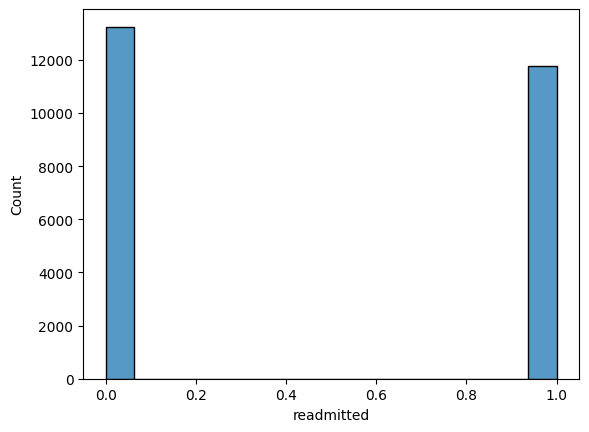

In [8]:
sns.histplot(data = dados, x = 'readmitted')

In [9]:
print('We have a bom balanceamento das variáveis alvos, temos {}% de pacientes que retornara ao hospital'.format(np.round(100 * dados.loc[dados.readmitted == 1].readmitted.value_counts() / len(dados),2)))

print('We have a bom balanceamento das variáveis alvos, temos {}% de pacientes não que retornara ao hospital'.format(np.round(100 * dados.loc[dados.readmitted == 0].readmitted.value_counts() / len(dados),2)))

print('O percentual de pacientes que dão entrada novamente é consideralmente maior caso já tenham dado entrada no hospital no ano anterior por exemplo {} % no caso de n_outpatient'.format(round(dados[dados['n_outpatient'] > 0]['readmitted'].value_counts()[1] / dados[dados['n_outpatient'] > 0]['readmitted'].value_counts().sum(),2)*100))


# me ddia de retorno é 46%, vamos avaliar indivudualmente se alguma coisa se sobressai sobre os demais

We have a bom balanceamento das variáveis alvos, temos 1    47.02
Name: readmitted, dtype: float64% de pacientes que retornara ao hospital
We have a bom balanceamento das variáveis alvos, temos 0    52.98
Name: readmitted, dtype: float64% de pacientes não que retornara ao hospital
O percentual de pacientes que dão entrada novamente é consideralmente maior caso já tenham dado entrada no hospital no ano anterior por exemplo 60.0 % no caso de n_outpatient


Parece que a qtd de pacientes readminitdos está bem balanceada

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.]),
 [Text(-1.0, 0, '−1'),
  Text(0.0, 0, '0'),
  Text(1.0, 0, '1'),
  Text(2.0, 0, '2'),
  Text(3.0, 0, '3'),
  Text(4.0, 0, '4'),
  Text(5.0, 0, '5'),
  Text(6.0, 0, '6')])

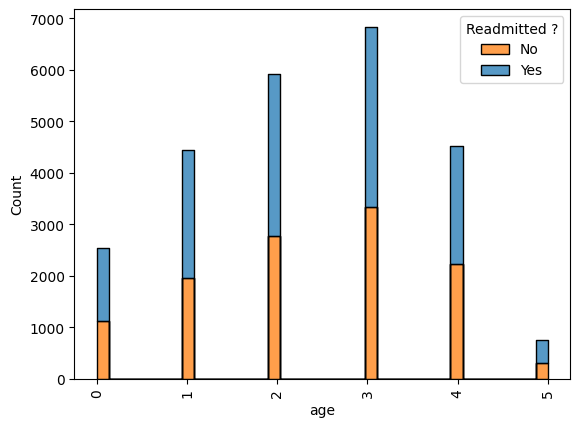

In [10]:
#dando uma olhada na distribuição das idades
sns.histplot(data = dados, x = 'age', hue = 'readmitted', element="step", multiple="stack")
plt.legend(title='Readmitted ?', loc='upper right', labels=['No', 'Yes'])
plt.xticks(rotation=90)


In [11]:
print('Faixa de idade {},  temos {}% de reinternação'.format(0, round(len(dados.loc[(dados.age == 0) & (dados.readmitted == 1)] )/len((dados.loc[dados.age == 0]))*100,2)))
print('Faixa de idade {},  temos {}% de reinternação'.format(0, round(len(dados.loc[(dados.age == 1) & (dados.readmitted == 1)] )/len((dados.loc[dados.age == 1]))*100,2)))
print('Faixa de idade {},  temos {}% de reinternação'.format(0, round(len(dados.loc[(dados.age == 2) & (dados.readmitted == 1)] )/len((dados.loc[dados.age == 2]))*100,2)))
print('Faixa de idade {},  temos {}% de reinternação'.format(0, round(len(dados.loc[(dados.age == 3) & (dados.readmitted == 1)] )/len((dados.loc[dados.age == 3]))*100,2)))
print('Faixa de idade {},  temos {}% de reinternação'.format(0, round(len(dados.loc[(dados.age == 4) & (dados.readmitted == 1)] )/len((dados.loc[dados.age == 4]))*100,2)))
print('Faixa de idade {},  temos {}% de reinternação'.format(0, round(len(dados.loc[(dados.age == 5) & (dados.readmitted == 1)] )/len((dados.loc[dados.age == 5]))*100,2)))

Faixa de idade 0,  temos 44.51% de reinternação
Faixa de idade 0,  temos 44.16% de reinternação
Faixa de idade 0,  temos 46.85% de reinternação
Faixa de idade 0,  temos 48.79% de reinternação
Faixa de idade 0,  temos 49.58% de reinternação
Faixa de idade 0,  temos 42.13% de reinternação


In [12]:
amostra = 25000
age = dados.groupby('age')['readmitted'].agg(['sum', 'count'])
age['participation_%'] = round(age['sum'] / age['count'],4)*100
age['representacao_%'] = round(age['count'] / amostra,4)*100
age

,sum,count,participation_%,representacao_%
age,,,,
0,1127,2532,44.51,10.13
1,1966,4452,44.16,17.81
2,2770,5913,46.85,23.65
3,3336,6837,48.79,27.35
4,2239,4516,49.58,18.06
5,316,750,42.13,3.00


<Axes: xlabel='time_in_hospital', ylabel='Count'>

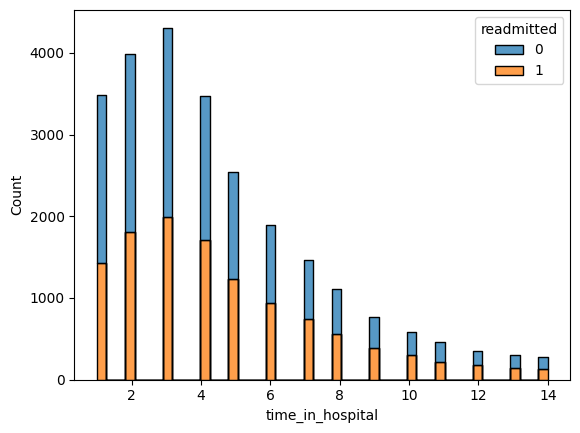

In [13]:
sns.histplot(data = dados, x = 'time_in_hospital', hue = 'readmitted', element="step", multiple="stack")

In [14]:
time_in_hospital = dados.groupby('time_in_hospital')['readmitted'].agg(['sum', 'count'])
time_in_hospital['participation_%'] = round(time_in_hospital['sum'] / time_in_hospital['count'],4)*100
time_in_hospital['representacao_%'] = round(time_in_hospital['count'] / amostra,4)*100
time_in_hospital

#nada significativo

,sum,count,participation_%,representacao_%
time_in_hospital,,,,
1,1426,3480,40.98,13.92
2,1806,3986,45.31,15.94
3,1989,4311,46.14,17.24
4,1713,3467,49.41,13.87
5,1228,2542,48.31,10.17
6,933,1895,49.23,7.58
7,746,1467,50.85,5.87
8,555,1104,50.27,4.42
9,391,768,50.91,3.07


<Axes: xlabel='n_lab_procedures', ylabel='Count'>

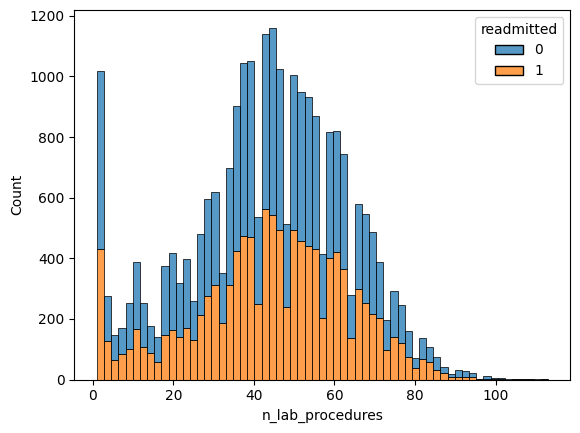

In [15]:
sns.histplot(data = dados, x = 'n_lab_procedures', hue = 'readmitted', multiple = 'stack')

<Axes: xlabel='n_lab_procedures', ylabel='Density'>

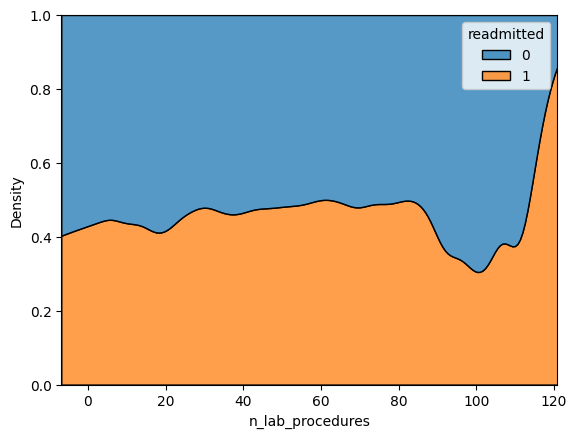

In [16]:
sns.kdeplot(data = dados, x = 'n_lab_procedures', hue = 'readmitted',  multiple="fill", thresh = 0.01)

In [17]:
n_lab_procedures = dados.groupby('n_lab_procedures')['readmitted'].agg(['sum', 'count'])
n_lab_procedures['participation_%'] = round(n_lab_procedures['sum'] / n_lab_procedures['count'],4)*100
n_lab_procedures['representacao_%'] = round(n_lab_procedures['count'] / amostra,4)*100
n_lab_procedures.head(10)

#nada significativo

,sum,count,participation_%,representacao_%
n_lab_procedures,,,,
1,299,751,39.81,3.00
2,133,268,49.63,1.07
3,81,173,46.82,0.69
4,47,102,46.08,0.41
5,34,79,43.04,0.32
6,32,68,47.06,0.27
7,42,80,52.50,0.32
8,44,90,48.89,0.36
9,101,251,40.24,1.00


<Axes: xlabel='n_procedures', ylabel='Count'>

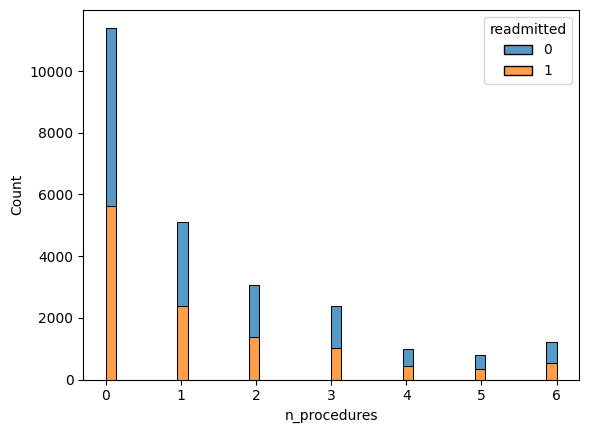

In [18]:
sns.histplot(data = dados, x = 'n_procedures', hue = 'readmitted', multiple = 'stack')

In [19]:
n_procedures = dados.groupby('n_procedures')['readmitted'].agg(['sum', 'count'])
n_procedures['participation_%'] = round(n_procedures['sum'] / n_procedures['count'],4)*100
n_procedures['representacao_%'] = round(n_procedures['count'] / amostra,4)*100
n_procedures

#nada significativo

,sum,count,participation_%,representacao_%
n_procedures,,,,
0,5625,11409,49.30,45.64
1,2395,5098,46.98,20.39
2,1382,3064,45.10,12.26
3,1023,2395,42.71,9.58
4,453,999,45.35,4.00
5,352,808,43.56,3.23
6,524,1227,42.71,4.91


<Axes: xlabel='n_medications', ylabel='Count'>

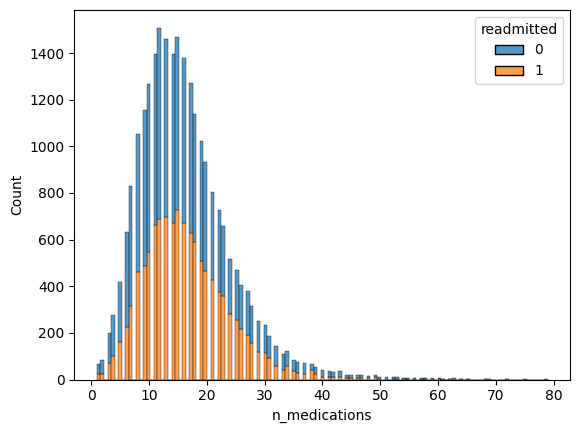

In [20]:
sns.histplot(data = dados, x = 'n_medications', hue = 'readmitted', multiple = 'stack')

In [21]:
n_medications = dados.groupby(dados.n_medications // 5)['readmitted'].agg(['sum', 'count'])
n_medications['participation_%'] = round(n_medications['sum'] / n_medications['count'],4)*100
n_medications['representacao_%'] = round(n_medications['count'] / amostra,4)*100
n_medications.head(30) #ajustar index

#podemos observar que os indivídos que tomam até 12 medicamentos representam 1/3 da nossa amostra e possum um retorno bem inferior ao esperado
#nada significativo

,sum,count,participation_%,representacao_%
n_medications,,,,
0,222,622,35.69,2.49
1,1648,4087,40.32,16.35
2,3272,7028,46.56,28.11
3,3124,6280,49.75,25.12
4,1912,3642,52.50,14.57
5,936,1821,51.40,7.28
6,366,799,45.81,3.20
7,157,349,44.99,1.40
8,55,164,33.54,0.66


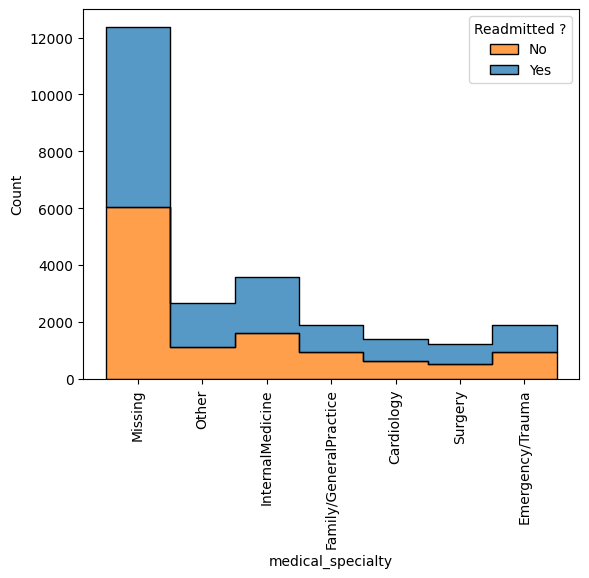

In [22]:
sns.histplot(data = dados, x = 'medical_specialty', hue = 'readmitted', element = "step", multiple = 'stack')
plt.xticks(rotation=90)
plt.legend(title='Readmitted ?', loc='upper right', labels=['No', 'Yes'])

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.]),
 [Text(-1.0, 0, '−1'),
  Text(0.0, 0, '0'),
  Text(1.0, 0, '1'),
  Text(2.0, 0, '2'),
  Text(3.0, 0, '3'),
  Text(4.0, 0, '4'),
  Text(5.0, 0, '5'),
  Text(6.0, 0, '6')])

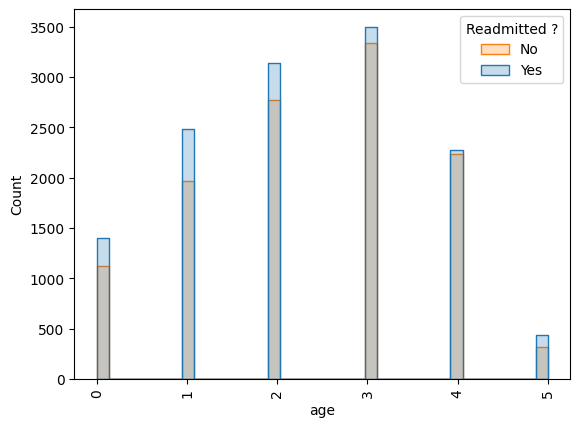

In [23]:
sns.histplot(data = dados, x = 'age', hue = 'readmitted', element="step")
plt.legend(title='Readmitted ?', loc='upper right', labels=['No', 'Yes'])
plt.xticks(rotation=90)

C:\Users\andre\AppData\Local\Temp\ipykernel_31192\2270864238.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)


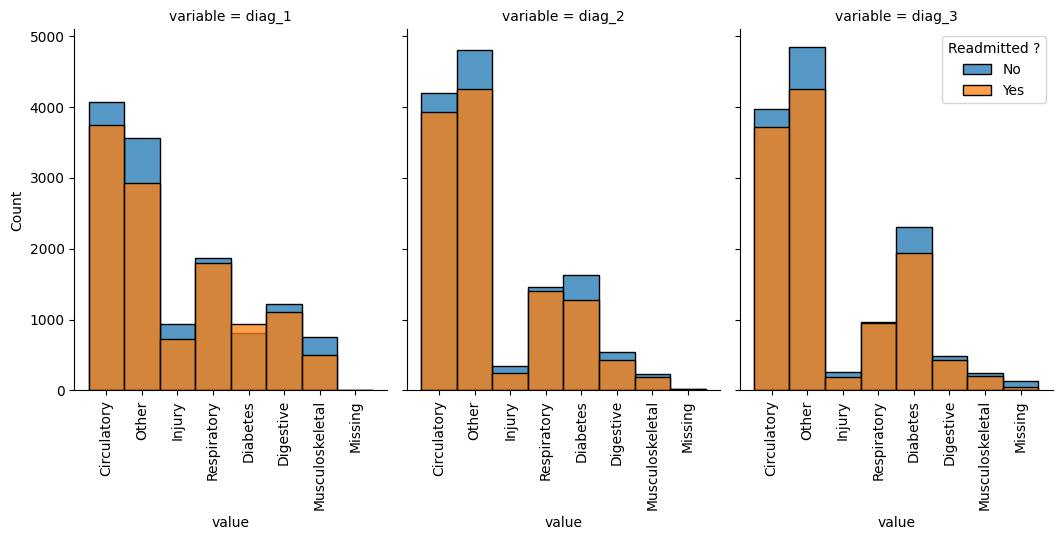

In [24]:

temp = pd.melt(dados, id_vars = ['readmitted'], value_vars = ['diag_1', 'diag_2', 'diag_3'])
g = sns.FacetGrid(temp, col = 'variable',  height = 5.5, aspect = 0.65, hue = 'readmitted')
g.map(sns.histplot, 'value', multiple = 'stack')
plt.legend(title='Readmitted ?', loc='upper right', labels=['No', 'Yes'])
for axes in g.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
plt.tight_layout()

In [25]:


diag_1 = dados.groupby(dados.diag_1)['readmitted'].agg(['sum', 'count'])
diag_1['participation_%'] = round(diag_1['sum'] / diag_1['count'],4)*100
diag_1['representacao_%'] = round(diag_1['count'] / amostra,4)*100
diag_1

,sum,count,participation_%,representacao_%
diag_1,,,,
Circulatory,3750,7824,47.93,31.30
Diabetes,937,1747,53.63,6.99
Digestive,1105,2329,47.45,9.32
Injury,727,1666,43.64,6.66
Missing,2,4,50.00,0.02
Musculoskeletal,495,1252,39.54,5.01
Other,2932,6498,45.12,25.99
Respiratory,1806,3680,49.08,14.72


dados.age.value_counts()

In [26]:


diag_2 = dados.groupby(dados.diag_2)['readmitted'].agg(['sum', 'count'])
diag_2['participation_%'] = round(diag_2['sum'] / diag_2['count'],4)*100
diag_2['representacao_%'] = round(diag_2['count'] / amostra,4)*100
diag_2

,sum,count,participation_%,representacao_%
diag_2,,,,
Circulatory,3932,8134,48.34,32.54
Diabetes,1283,2906,44.15,11.62
Digestive,431,973,44.30,3.89
Injury,240,591,40.61,2.36
Missing,17,42,40.48,0.17
Musculoskeletal,197,426,46.24,1.70
Other,4248,9056,46.91,36.22
Respiratory,1406,2872,48.96,11.49


In [27]:


diag_3 = dados.groupby(dados.diag_2)['readmitted'].agg(['sum', 'count'])
diag_3['participation_%'] = round(diag_3['sum'] / diag_3['count'],4)*100
diag_3['representacao_%'] = round(diag_3['count'] / amostra,4)*100
diag_3

,sum,count,participation_%,representacao_%
diag_2,,,,
Circulatory,3932,8134,48.34,32.54
Diabetes,1283,2906,44.15,11.62
Digestive,431,973,44.30,3.89
Injury,240,591,40.61,2.36
Missing,17,42,40.48,0.17
Musculoskeletal,197,426,46.24,1.70
Other,4248,9056,46.91,36.22
Respiratory,1406,2872,48.96,11.49


In [28]:


diag_4 = dados.groupby(['diag_1', 'diag_2'])['readmitted'].agg(['sum', 'count'])
diag_4['participation_%'] = round(diag_4['sum'] / diag_4['count'],4)*100
diag_4['representacao_%'] = round(diag_4['count'] / amostra,4)*100
diag_4.sort_values(by = ['participation_%'], ascending = False)

#a problema called diabetes

sum  count  participation_%  representacao_%
diag_1          diag_2                                                        
Missing         Diabetes            1      1           100.00             0.00
Respiratory     Missing             1      1           100.00             0.00
Digestive       Missing             2      2           100.00             0.01
Other           Missing             3      4            75.00             0.02
Diabetes        Diabetes           13     19            68.42             0.08
Circulatory     Missing             3      5            60.00             0.02
Diabetes        Musculoskeletal    41     72            56.94             0.29
                Circulatory       254    459            55.34             1.84
                Other             526    992            53.02             3.97
Digestive       Respiratory        98    187            52.41             0.75
Diabetes        Injury             11     21            52.38             0.08
Respiratory     Injury             12     23            52.17             0.09
                Circulatory       603   1164            51.80             4.66
Diabetes        Digestive          39     76            51.32             0.30
                Respiratory        50     98            51.02             0.39
Respiratory     Respiratory       456    901            50.61             3.60
Missing         Other               1      2            50.00             0.01
Respiratory     Musculoskeletal    23     46            50.00             0.18
Other           Circulatory       650   1305            49.81             5.22
                Musculoskeletal    46     93            49.46             0.37
Digestive       Other             477    966            49.38             3.86
Circulatory     Other             844   1719            49.10             6.88
                Respiratory       450    921            48.86             3.68
                Diabetes          403    839            48.03             3.36
Other           Respiratory       266    561            47.42             2.24
Circulatory     Circulatory      1925   4066            47.34            16.26
Injury          Digestive          24     51            47.06             0.20
Digestive       Musculoskeletal     8     17            47.06             0.07
Respiratory     Digestive          30     64            46.88             0.26
Circulatory     Injury             72    154            46.75             0.62
Digestive       Circulatory       204    440            46.36             1.76
Injury          Circulatory       178    384            46.35             1.54
Circulatory     Digestive          36     78            46.15             0.31
Respiratory     Other             440    956            46.03             3.82
                Diabetes          241    525            45.90             2.10
Digestive       Diabetes          131    286            45.80             1.14
Injury          Other             337    746            45.17             2.98
Musculoskeletal Respiratory        41     91            45.05             0.36
Other           Other            1458   3288            44.34            13.15
Digestive       Digestive         173    397            43.58             1.59
Other           Digestive         124    287            43.21             1.15
Musculoskeletal Other             165    387            42.64             1.55
Injury          Diabetes           68    160            42.50             0.64
Other           Diabetes          324    799            40.55             3.20
Circulatory     Musculoskeletal    17     42            40.48             0.17
Musculoskeletal Musculoskeletal    49    122            40.16             0.49
Injury          Respiratory        45    113            39.82             0.45
                Musculoskeletal    13     34            38.24             0.14
Other           Injury             61    161            37.89             0.64
Muscu

C:\Users\andre\AppData\Local\Temp\ipykernel_31192\1419708820.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dados.corr(),


<Axes: >

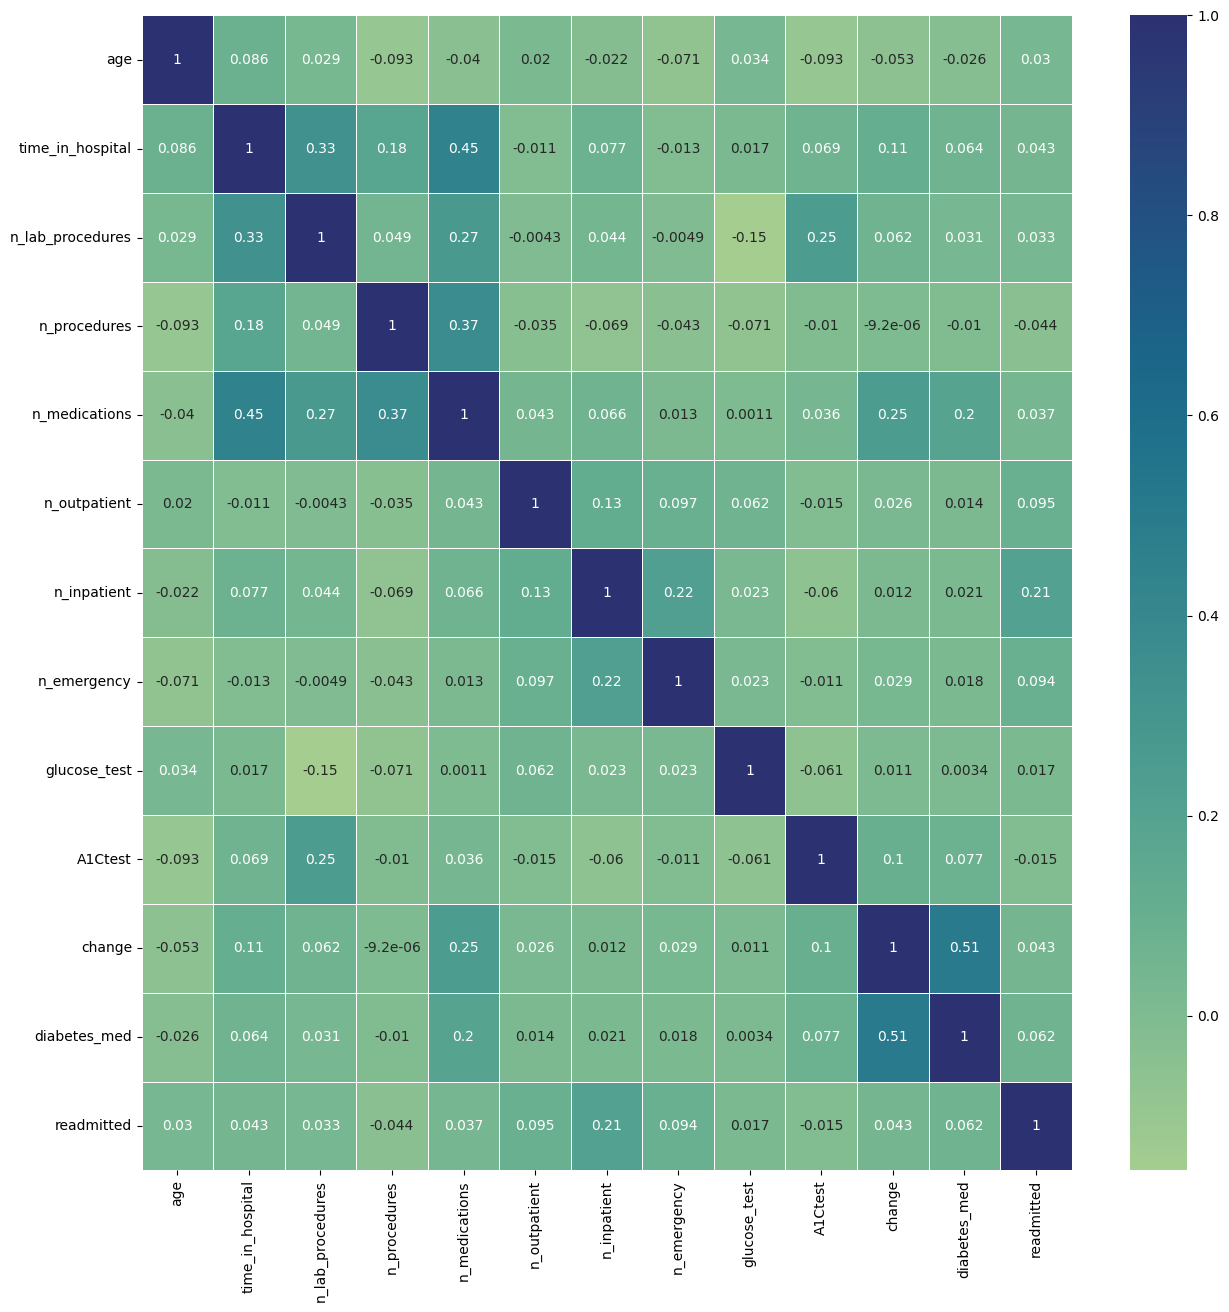

In [29]:
fig, ax = plt.subplots(figsize= (15, 15))
sns.heatmap(dados.corr(),
            annot= True,
            linewidths= 0.5,
            cmap = 'crest',
            )

Me parece que apesar de baixo, a maior correlação com os pacientes readmitidos são os que anteriormente já possuiam níveis de internação ao hospital

In [30]:


glucose_test = dados.groupby('glucose_test')['readmitted'].agg(['sum', 'count'])
glucose_test['participation_%'] = round(glucose_test['sum'] / glucose_test['count'],4)*100
glucose_test['representacao_%'] = round(glucose_test['count'] / amostra,4)*100
glucose_test.sort_values(by = ['participation_%'], ascending = False)



,sum,count,participation_%,representacao_%
glucose_test,,,,
2,357,686,52.04,2.74
1,333,689,48.33,2.76
0,11064,23625,46.83,94.50


In [31]:


A1Ctest = dados.groupby('A1Ctest')['readmitted'].agg(['sum', 'count'])
A1Ctest['participation_%'] = round(A1Ctest['sum'] / A1Ctest['count'],4)*100
A1Ctest['representacao_%'] = round(A1Ctest['count'] / amostra,4)*100
A1Ctest.sort_values(by = ['participation_%'], ascending = False)



,sum,count,participation_%,representacao_%
A1Ctest,,,,
0,9935,20938,47.45,83.75
2,1299,2827,45.95,11.31
1,520,1235,42.11,4.94


In [32]:


diabetes_med = dados.groupby(['diabetes_med', 'change'])['readmitted'].agg(['sum', 'count'])
diabetes_med['participation_%'] = round(diabetes_med['sum'] / diabetes_med['count'],4)*100
diabetes_med['representacao_%'] = round(diabetes_med['count'] / amostra,4)*100
diabetes_med.sort_values(by = ['participation_%'], ascending = False)



sum  count  participation_%  representacao_%
diabetes_med change                                               
1            1       5677  11503            49.35            46.01
             0       3690   7725            47.77            30.90
0            0       2387   5772            41.35            23.09

In [33]:
print(dados[dados['n_inpatient'] > 0]['readmitted'].value_counts().sum())

print(dados[dados['n_emergency'] > 0]['readmitted'].value_counts().sum())

print(dados[dados['n_outpatient'] > 0]['readmitted'].value_counts().sum())


print(dados.loc[(dados['n_outpatient'] > 1) | (dados['n_emergency'] > 1) | (dados['n_inpatient'] > 1)]['readmitted'].value_counts())
#isnt the first time? They will be back
print(dados.loc[(dados['n_outpatient'] > 0) | (dados['n_emergency'] > 0) | (dados['n_inpatient'] > 0)]['readmitted'].value_counts())

print(dados.loc[ (dados['n_emergency'] > 1) | (dados['n_inpatient'] > 1)]['readmitted'].value_counts())
#isnt the first time? They will be back
print(dados.loc[ (dados['n_emergency'] > 0) | (dados['n_inpatient'] > 0)]['readmitted'].value_counts())

8463
2728
4141
1    3558
0    1878
Name: readmitted, dtype: int64
1    6619
0    4688
Name: readmitted, dtype: int64
1    2762
0    1240
Name: readmitted, dtype: int64
1    5739
0    3806
Name: readmitted, dtype: int64


In [34]:
print(dados[dados['n_inpatient'] > 1]['readmitted'].value_counts().sum())

print(dados[dados['n_emergency'] > 1]['readmitted'].value_counts().sum())

print(dados[dados['n_outpatient'] > 1]['readmitted'].value_counts().sum())


3537
886
2065


In [35]:
print('No caso de n_inpatient > 0, {}%  dão entrada novamente, representão {} do total'.format(round(dados[dados['n_inpatient'] > 0]['readmitted'].value_counts()[1] / dados[dados['n_inpatient'] > 0]['readmitted'].value_counts().sum(),4)*100,round(dados[dados['n_inpatient'] > 0]['readmitted'].value_counts()[1] / amostra,4)*100 ))

print('No caso de n_emergency > 0, {}%  dão entrada novamente, representão {} do total'.format(round(dados[dados['n_emergency'] > 0]['readmitted'].value_counts()[1] / dados[dados['n_emergency'] > 0]['readmitted'].value_counts().sum(),4)*100,round(dados[dados['n_emergency'] > 0]['readmitted'].value_counts()[1] / amostra,4)*100 ))

print('No caso de n_outpatient > 0, {}%  dão entrada novamente, representão {} do total'.format(round(dados[dados['n_outpatient'] > 0]['readmitted'].value_counts()[1] / dados[dados['n_outpatient'] > 0]['readmitted'].value_counts().sum(),2)*100,round(dados[dados['n_outpatient'] > 0]['readmitted'].value_counts()[1] / amostra,4)*100 ))

No caso de n_inpatient > 0, 60.99%  dão entrada novamente, representão 20.65 do total
No caso de n_emergency > 0, 62.94%  dão entrada novamente, representão 6.87 do total
No caso de n_outpatient > 0, 60.0%  dão entrada novamente, representão 9.959999999999999 do total


In [36]:
print('No caso de n_inpatient > 1, {}%  dão entrada novamente, representão {} do total'.format(round(dados[dados['n_inpatient'] > 1]['readmitted'].value_counts()[1] / dados[dados['n_inpatient'] > 1]['readmitted'].value_counts().sum(),4)*100,round(dados[dados['n_inpatient'] > 1]['readmitted'].value_counts()[1] / amostra,4)*100 ))

print('No caso de n_emergency > 1, {}%  dão entrada novamente, representão {} do total'.format(round(dados[dados['n_emergency'] > 1]['readmitted'].value_counts()[1] / dados[dados['n_emergency'] > 1]['readmitted'].value_counts().sum(),4)*100,round(dados[dados['n_emergency'] > 1]['readmitted'].value_counts()[1] / amostra,4)*100 ))

print('No caso de n_outpatient > 1, {}%  dão entrada novamente, representão {} do total'.format(round(dados[dados['n_outpatient'] > 1]['readmitted'].value_counts()[1] / dados[dados['n_outpatient'] > 1]['readmitted'].value_counts().sum(),2)*100,round(dados[dados['n_outpatient'] > 1]['readmitted'].value_counts()[1] / amostra,4)*100 ))

No caso de n_inpatient > 1, 69.72%  dão entrada novamente, representão 9.86 do total
No caso de n_emergency > 1, 71.11%  dão entrada novamente, representão 2.52 do total
No caso de n_outpatient > 1, 62.0%  dão entrada novamente, representão 5.11 do total


#Ele veio ano passado? Vai voltar novamente

In [37]:
dados[dados.age == 1]['readmitted'].value_counts()

0    2486
1    1966
Name: readmitted, dtype: int64

C:\Users\andre\AppData\Local\Temp\ipykernel_31192\1419708820.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dados.corr(),


<Axes: >

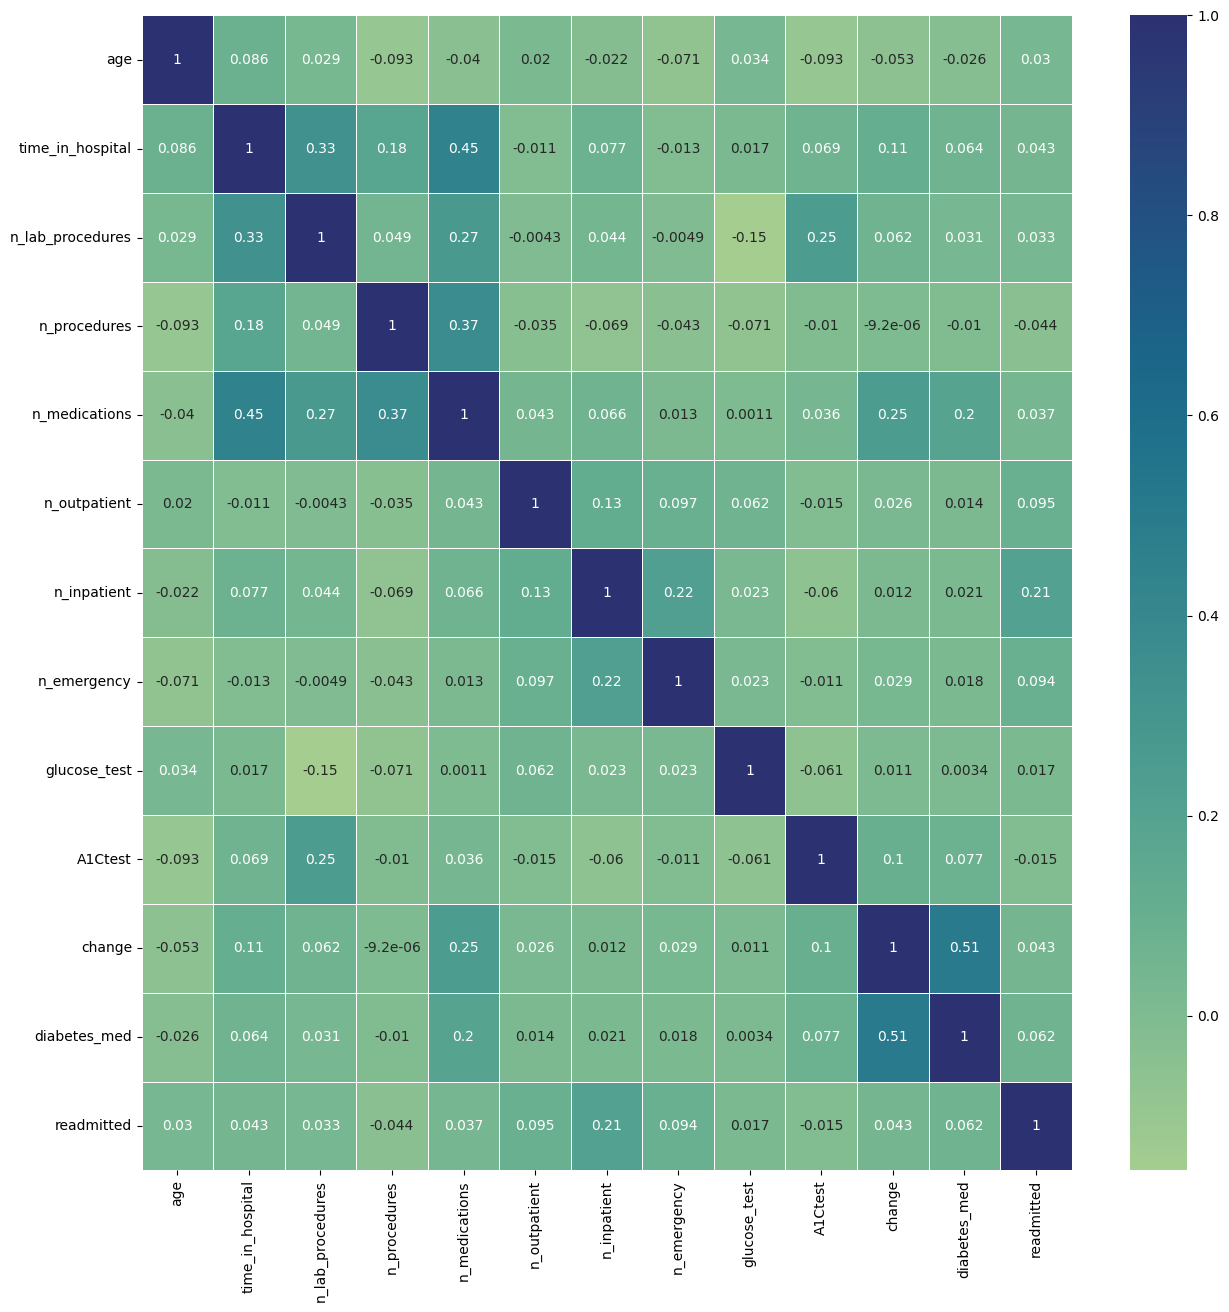

In [38]:
fig, ax = plt.subplots(figsize= (15, 15))
sns.heatmap(dados.corr(),
            annot= True,
            linewidths= 0.5,
            cmap = 'crest',
            )

In [39]:
#g = sns.pairplot(data = dados, hue = 'readmitted')
#g.map_lower(sns.kdeplot, levels = 4, colors = '0.2')

In [40]:
dados.columns

Index(['age', 'time_in_hospital', 'n_lab_procedures', 'n_procedures', 'n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'glucose_test', 'A1Ctest', 'change', 'diabetes_med', 'readmitted'], dtype='object')

In [41]:
teste1 = dados[['age', 'time_in_hospital', 'n_lab_procedures', 'n_procedures', 'n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency', 'glucose_test', 'A1Ctest', 'change', 'diabetes_med', 'readmitted']]
X = dados.drop('readmitted', axis = 1)
y = dados['readmitted']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [42]:
#dados2.info()

#X = dados2.drop('readmitted', axis = 1)
#y = dados2['readmitted']

#dic = {'no' : 0 ,
#        'yes': 1}
#y = y.replace(dic)

#from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [43]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                25000 non-null  int64 
 1   time_in_hospital   25000 non-null  int64 
 2   n_lab_procedures   25000 non-null  int64 
 3   n_procedures       25000 non-null  int64 
 4   n_medications      25000 non-null  int64 
 5   n_outpatient       25000 non-null  int64 
 6   n_inpatient        25000 non-null  int64 
 7   n_emergency        25000 non-null  int64 
 8   medical_specialty  25000 non-null  object
 9   diag_1             25000 non-null  object
 10  diag_2             25000 non-null  object
 11  diag_3             25000 non-null  object
 12  glucose_test       25000 non-null  int64 
 13  A1Ctest            25000 non-null  int64 
 14  change             25000 non-null  int64 
 15  diabetes_med       25000 non-null  int64 
 16  readmitted         25000 non-null  int64

In [44]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


#preprocessor
numeric_transformer = Pipeline(steps = [('scaler', MinMaxScaler())])
categorical_transformer = Pipeline(steps = [('encoder', OneHotEncoder())])



numeric_features = ['age', 'time_in_hospital', 'n_lab_procedures', 'n_procedures', 'n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency', 'glucose_test', 'A1Ctest', 'change', 'diabetes_med'] 
categorical_features = ['medical_specialty', 'diag_1', 'diag_2', 'diag_3']
preprocessor = ColumnTransformer(
   transformers=[
    ('numeric', numeric_transformer, numeric_features)
   ,('categorical', categorical_transformer, categorical_features)
]) 

In [45]:
# Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.dummy import DummyClassifier


pipe_lr = Pipeline([('preprocessor', preprocessor),
                    ('LR', LogisticRegression(random_state=42))])
pipe_dt = Pipeline([('preprocessor', preprocessor),
                    ('DT',DecisionTreeClassifier(random_state=42))])
pipe_rf = Pipeline([('preprocessor', preprocessor),
                    ('RF',RandomForestClassifier(random_state=42))])
pipe_knn = Pipeline([('preprocessor', preprocessor),
                    ('KNN', KNeighborsClassifier())])
pipe_svm = Pipeline([('preprocessor', preprocessor),
                     ('SVC', svm.SVC(random_state=42))])
pipe_xgb = Pipeline([('preprocessor', preprocessor),
                     ('XGB', XGBClassifier(random_state=42))])
pipe_dummy = Pipeline([('preprocessor', preprocessor),
                     ('XGB', DummyClassifier(strategy="most_frequent"))])

In [46]:
#Treinando todos os modelos de uma vez
modelos = [pipe_lr, pipe_dt, pipe_rf, pipe_knn, pipe_svm, pipe_xgb, pipe_dummy]
for pipe in modelos:
    pipe.fit(X_train,y_train)


# rodando as avaliações
modelos_dic = {0: 'Logistic Regression', 1: 'Decision Trees', 
             2: 'Random Forest', 3: 'KNeighborsClassifier', 
             4: 'SVC', 5 : 'XGB', 6 : 'Dummy'}
for i, model in enumerate(modelos):
    print('{} Acurácia do teste: {}'.format(modelos_dic[i], model.score(X_test,y_test)))

        

c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Acurácia do teste: 0.6144
Decision Trees Acurácia do teste: 0.5401333333333334
Random Forest Acurácia do teste: 0.6022666666666666
KNeighborsClassifier Acurácia do teste: 0.5292
SVC Acurácia do teste: 0.5984
XGB Acurácia do teste: 0.6041333333333333
Dummy Acurácia do teste: 0.5326666666666666


IndexError: index 8 is out of bounds for axis 0 with size 8

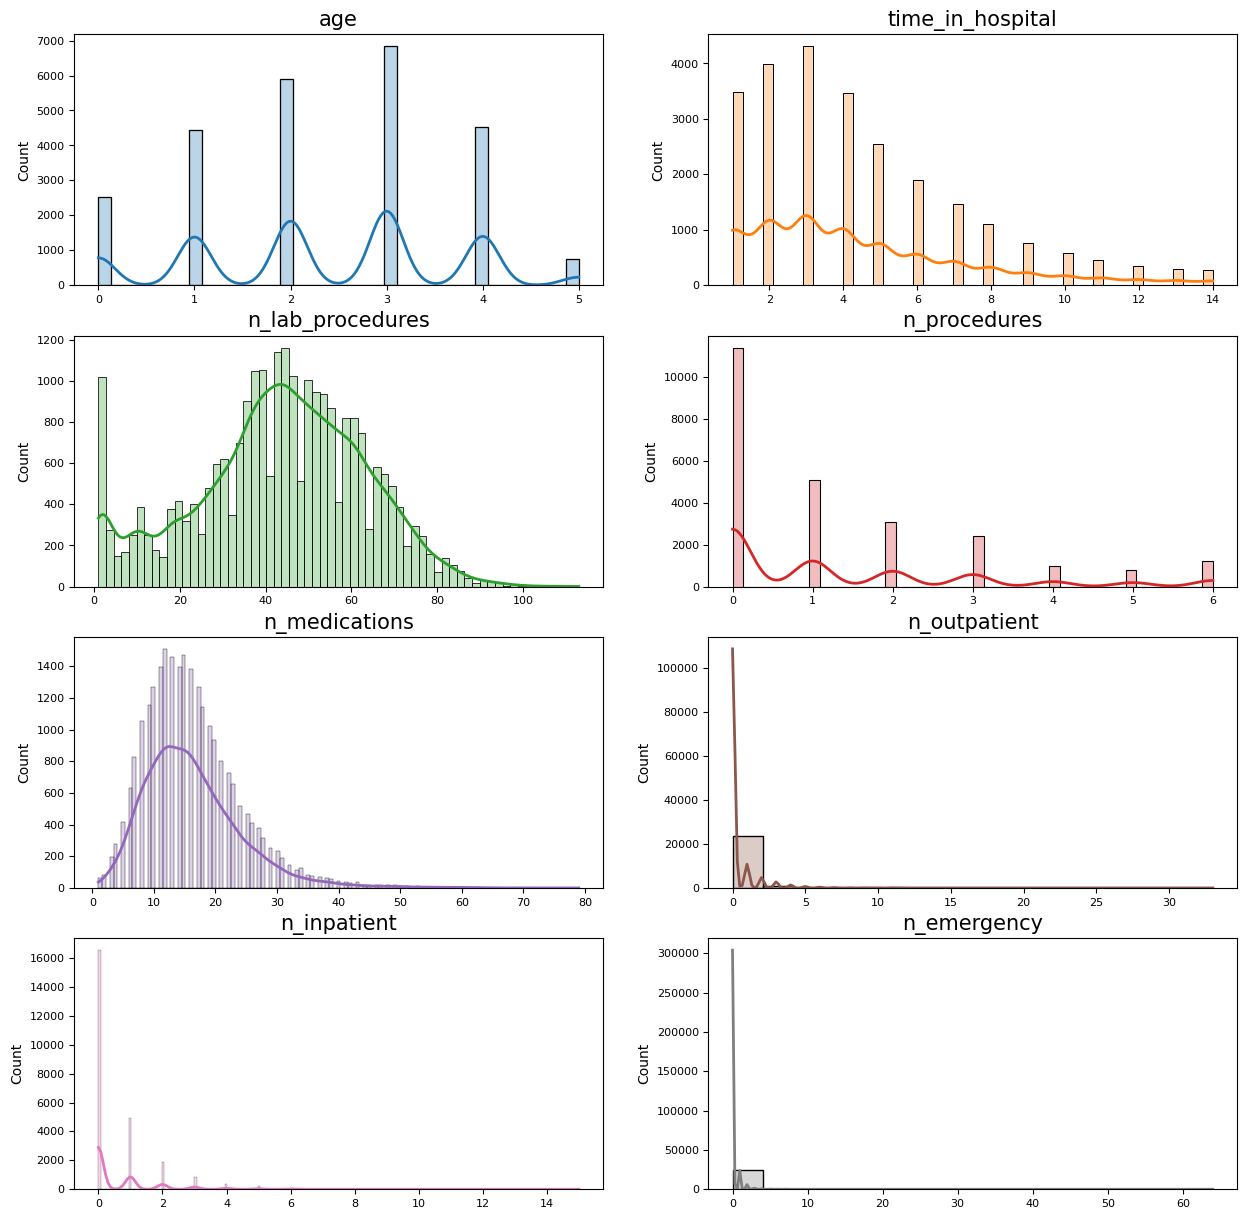

In [47]:
# Variáveis Numéricas

# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))
axes = axes.flat
columnas_numeric = dados.select_dtypes(include=['float64', 'int']).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = dados,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 15)
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")
    


fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('\nDistribution of numeric features', fontsize = 25);